# Second Project - IART - Supervised Learning

### Authors
* Afonso Dias up202006721
* Pedro Camargo up202102365

## Software/Library Installation 
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including neural networks, support vector machines, random forests, gradient boosting, k-means and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Start by installing Python, Anaconda, Jupyter Labs, NumPy, SciPy, Pandas, Scikit-Learn, MatPlotLib and Seaborn. In fact, it is only needed to install Anaconda that contain all the others following the link: https://www.anaconda.com/products/individual 
Information about the rest of the packages/libraries may be found at: 

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  

After installing all the libraries, please continue with this Notebook.

## About the data set


We start by reading the data into a pandas DataFrame. The data comes from the "nasa.csv" file.
Overall an asteroid is considered hazardous if  

* MOID<=0.05 au
* H<=22.0 	
Potentially Hazardous Asteroids: NEAs whose Minimum Orbit Intersection Distance (MOID) with the Earth is 0.05 au or less and whose absolute magnitude (H) is 22.0 or brighter


In [2]:
import pandas as pd

nasa_data = pd.read_csv('nasa.csv')
pd.set_option("display.max_columns", None)
nasa_data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Now we take a look at the distribution of our data, by printing out some summary statistic about the data set.

In [3]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
nasa_data.describe()

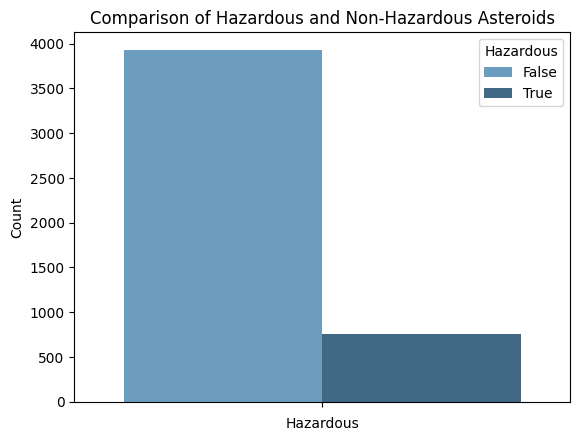

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = nasa_data['Hazardous'].value_counts()

sns.barplot(hue=counts.index, y=counts.values, palette="Blues_d")

plt.title('Comparison of Hazardous and Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')

plt.show()

# Exploratory Data Analysis - EDA

In this section we are going to clean up our dataset, because as we will see there are some collumns with the same information only with diferent units which we can remove to reduce the noise produced. Also we will find which collumns contribute the most to the findings of whether or not an asteroid is hazardous or not, which is the goal of this analysis.


As we can see from the output of the datasete info, there are no null values on any of the columns so we don't need to worry about null values. We can proceed to eliminate right away some of the columns which will not be usefull for our classification, such as identifiers and dates of certain findings and as already described columns which describe the same information only with diferent units.

In [ ]:
# Here we drop the identifiers and dates of the orbit findings
cols_to_drop = ['Neo Reference ID','Name','Orbit ID','Close Approach Date','Epoch Date Close Approach', 'Orbit Determination Date'] 
# We also drop the columns with the same information
cols_to_drop.extend(nasa_data.filter(regex='Est Dia in (?!KM)').columns.tolist())
cols_to_drop.extend(nasa_data.filter(regex='Miss Dist.(?!kilometers)').columns.tolist())
cols_to_drop.extend(['Relative Velocity km per sec','Miles per hour'])

nasa_data = nasa_data.drop(cols_to_drop,axis=1)

nasa_data.head()

Now we verify is the Orbiting Body and Equinox have any diferent values, if they are all the same we can simply drop them

In [ ]:
print(nasa_data['Equinox'].value_counts())  
print(nasa_data['Orbiting Body'].value_counts())


There are no diferent values in both of the columns so we can drop them. All of the asteroids are orbiting the Earth and all of them have the same equinox.

In [8]:
nasa_data = nasa_data.drop(['Equinox','Orbiting Body'],axis=1)

To properply process the data for the machine learning models we need to transform some of the data that are non-numerical to numerical data, such has the Hazardous column which we can transform to 1's or 0's depending wether or not they are true or false.

We can use a correlation matrix to summarize a large data set and to identify patterns and make a decision according to it. We can also see which variable is more correlated to which variable, and we can visualize our results.

In [ ]:
import numpy as np

if nasa_data['Hazardous'].dtype == 'bool':
    nasa_data['Hazardous'] = nasa_data['Hazardous'].astype(int)

plt.figure(figsize = (20,20))
sns.heatmap(nasa_data.corr(), annot=True, fmt=".2f", square=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation matrix of numeric features')


As a result from this correlation matrix we can conclude that we can also remove either the Est Dia in Km min or max because they have a correlation value of 1 in between them. We choose to remove the maximum diameter, because if we conclude that an asteroid is hazardous with it´s estimated minimum diameter we will have the same conclusion with a bigger diameter for the same asteroid.

In [ ]:
nasa_data = nasa_data.drop('Est Dia in KM(max)',axis=1)

We will now evalute which features contribute the best for the classification of the asteroids by using the machine learning model Random Forest Classifier.

Our x is all the columns except our target which is Hazardous and our y is the actual target Hazardous.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = nasa_data.drop('Hazardous', axis = 1)
y = nasa_data['Hazardous']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


forest = RandomForestClassifier() 
forest.fit(x_train, y_train) 
importances = forest.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots() 
forest_importances.plot.bar(yerr=std, ax=ax) 
ax.set_title("Feature importances using MDI") 
ax.set_ylabel("Mean decrease in impurity") 
plt.tight_layout() 
plt.show()

Now that we know which features are the most important, we can train our model with those

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function definition to be able to used for other models aswell
def training(model, name, axes):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, ax=axes)
    axes.set_title("{}: {}%".format(name, round(score*100, 2)))
    return score*100, report

rfc = RandomForestClassifier() 

fig, ax = plt.subplots(figsize=(10, 7))

score, report = training(rfc,'RandomForestClassifier',ax)
plt.show()

In [ ]:
print("### Random Forest Classifier ###")
print(report)

• The (0,0) cell with a value around 800 represents the true negatives (TN), meaning the model correctly predicted 800 instances as non-hazardous.  
• The (1,1) cell with a value around 200 represents the true positives (TP), meaning the model correctly predicted 200 instances as hazardous.  
• The cells (1,0) and (0,1) with values lower than 100 represent the false negatives (FN) and false positives (FP) respectively. FN is when the model incorrectly predicted a hazardous instance as non-hazardous, and FP is when the model incorrectly predicted a non-hazardous instance as hazardous.  

Overall our RFC model had a score of about 99.57% with this iteration.All of our scores seem very good, they are all around the 0.99-1 values, but this very likely is a cause of a very unbalanced dataset, because as we can see in our support column there is about 800 values with 0(non-Hazardous) and about 150 with 1 (Hazardous).

Now a good thing to do is to compare our RFC model with other machine learning models. The first one we are going to take a look at is the XGBoost

In [ ]:
from xgboost import XGBClassifier

xgBoost = XGBClassifier()

score, report = training(xgBoost, 'XGBoost', ax)
print(report)
plt.show()


# References

• CNEOS Website, Article about how NEO (Near Earth Objects) are classified    
https://cneos.jpl.nasa.gov/about/neo_groups.html  

• Article about the benefits and usage of a correlation matrix  
https://builtin.com/data-science/correlation-matrix

• Kaggle project's used for comparison and research
https://www.kaggle.com/code/lovishbansal123/asteroid-classification-xgboost-classifier
https://www.kaggle.com/code/a3amat02/asteroids-eda-classification#Scaling-selected-features

• Article about best practices for an imbalanced data set
https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38